# Nikhil Nemkumar Dhabu | Data Science and Business Analytics Intern   
## The Sparks Foundation

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

In [222]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

## Reading the data

In [223]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [224]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [225]:
inertia_list = []
for num_clusters in np.arange(1, 15):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(iris_df)
    inertia_list.append(kmeans.inertia_)

In [226]:
labels = kmeans.predict(iris_df)
labels

array([ 8,  0,  0,  0,  8,  4,  0,  8,  0,  0,  4,  8,  0,  0,  4,  4,  4,
        8,  4,  4,  8,  8,  0,  8,  8,  0,  8,  8,  8,  0,  0,  8,  4,  4,
        0,  8,  4,  8,  0,  8,  8,  0,  0,  8,  4,  0,  4,  0,  4,  8,  6,
        6,  6, 12,  6,  2,  6,  7,  6, 12,  7,  2, 12,  6, 12,  6,  2, 12,
        9, 12,  1,  2,  9,  6,  6,  6,  6, 10,  2, 12, 12, 12, 12,  1,  2,
        6,  6,  9,  2, 12,  2,  6, 12,  7,  2,  2,  2,  6,  7,  2, 13,  1,
        5,  3, 13,  5,  2,  5,  3, 11, 10, 10, 13,  1,  1, 13,  3, 11,  5,
        9, 13,  1,  5, 10, 13,  5, 10,  1,  3,  5,  5, 11,  3, 10,  3,  5,
       13,  3,  1, 13, 13, 13,  1, 13, 13, 13, 10, 10, 13,  1])

## Printing the centroids of each cluster

In [227]:
centroids = kmeans.cluster_centers_
centroids

array([[4.66111111, 3.07777778, 1.38888889, 0.2       ],
       [5.86      , 2.84      , 4.99      , 1.9       ],
       [5.64615385, 2.84615385, 4.3       , 1.37692308],
       [6.4       , 2.81428571, 5.6       , 1.84285714],
       [5.4       , 3.89230769, 1.50769231, 0.26923077],
       [7.43333333, 2.92222222, 6.26666667, 1.98888889],
       [6.4625    , 3.025     , 4.5875    , 1.41875   ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [5.06315789, 3.44210526, 1.5       , 0.27368421],
       [6.2       , 2.3       , 4.7       , 1.45      ],
       [6.4       , 2.8375    , 5.05      , 1.825     ],
       [7.6       , 3.73333333, 6.4       , 2.23333333],
       [5.625     , 2.54166667, 3.86666667, 1.15833333],
       [6.62857143, 3.18571429, 5.56428571, 2.29285714]])

## Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are


In [228]:
print(kmeans.inertia_)
print(len(inertia_list))

20.636141162200374
14


## Plotting the Elbow Curve

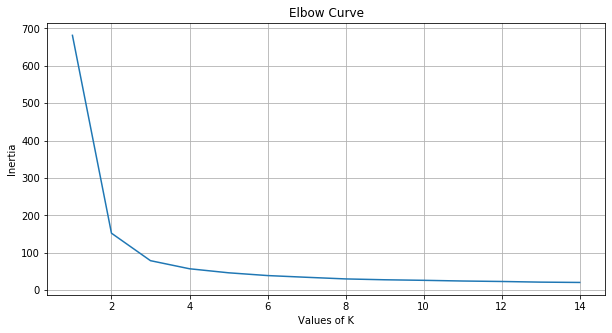

In [229]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 15), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 3.**

### Using PCA to convert to 2 features.

Text(0.5, 1.0, 'Before clustering ')

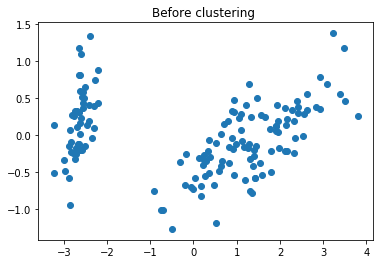

In [219]:
pca = PCA(n_components=2).fit(iris_df)
pca_2d = pca.transform(iris_df)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])
plt.title('Before clustering ')

## Here, we are assuming the value of k as 3

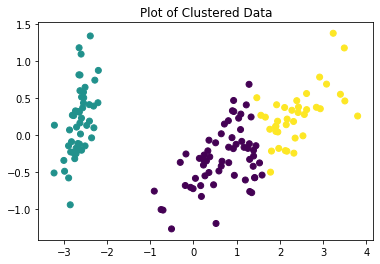

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [220]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris_df)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.title('Plot of Clustered Data')
plt.show()
plt.legend

### Conclusion: optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 3.